In [1]:
import numpy
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import statsmodels.api as sm
import pandas
from scipy.io import loadmat

def summarize(name, x, y, bins):
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    
    mean = numpy.average(y)
    std = numpy.std(y)
    # print(mean, std)
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Data, Mean, Std')
    plot_sampled, = ax.plot(x, y, 'b', label="Samples")
    plot_mean, = ax.plot([x_min, x_max], [mean, mean], 'r', label="Mean")
    ax.scatter([x_min], [std])
    ax.annotate(f"Std Div({std:.3f})", (x_min, std), xytext=(8,8), textcoords='offset pixels', bbox=dict(boxstyle="square,pad=0.3",fc="lightblue", ec="steelblue", lw=2))
    ax.legend()
    
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Histogram')
    ax.hist(y, bins=bins)
    #ax.legend()

    density = gaussian_kde(y)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    xs = numpy.linspace(y_min, y_max, 200)
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Density Plot')
    ax.plot(xs, density(xs))
    
    fig, ax = plt.subplots()
    ax.set_title(f'{name} - Box Plot')
    ax.boxplot(y)

    fig, ax = plt.subplots()
    ax.set_title(f'{name} - LAG 1 Plot')
    ax.set_xlabel('y')
    ax.set_ylabel('y-1')
    ax.plot(y[:-1], y[1:], 'x')

    # fig, ax = plt.subplots()
    # ax.set_title(f'{name} - Autocorrelation Plot')
    # ax.acorr(y, normed=True, maxlags=40, lw=2)

    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_acf(y, lags=40, ax=ax)
    ax.set_title(f'{name} - Autocorrelation Plot')

    fig, ax = plt.subplots()
    sm.graphics.tsa.plot_pacf(y, lags=40, ax=ax, method='ywm')
    ax.set_title(f'{name} - Partial Autocorrelation Plot')

    print('Ljung Box\n', sm.stats.acorr_ljungbox(y, lags=[5], return_df=True))

    print('ADF')
    result = sm.tsa.adfuller(y, maxlag=40)
    print(f"ADF Statistic: {result[0]}")
    print(f"ADF p_value: {result[1]}")
    for key, value in result[4].items():
        print(f"ctrical value: {key}, {value}")
    

Ljung Box
    lb_stat  lb_pvalue
5   1.3737   0.927168
ADF
ADF Statistic: -71.1667132376083
ADF p_value: 0.0
ctrical value: 1%, -3.431658793968827
ctrical value: 5%, -2.862118345383404
ctrical value: 10%, -2.567077853953267
Ljung Box
     lb_stat  lb_pvalue
5  5.127214   0.400553
ADF
ADF Statistic: -3.6077101516531056
ADF p_value: 0.005615325505060199
ctrical value: 1%, -3.50434289821397
ctrical value: 5%, -2.8938659630479413
ctrical value: 10%, -2.5840147047458037


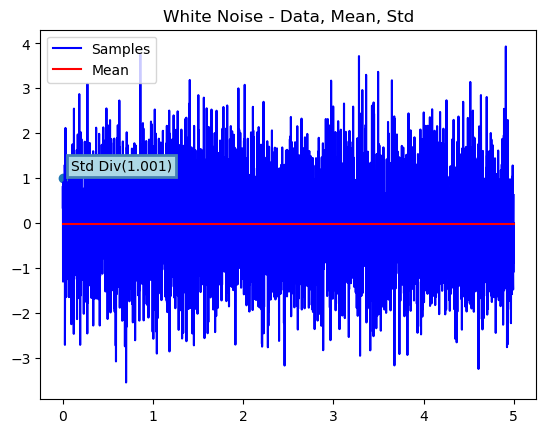

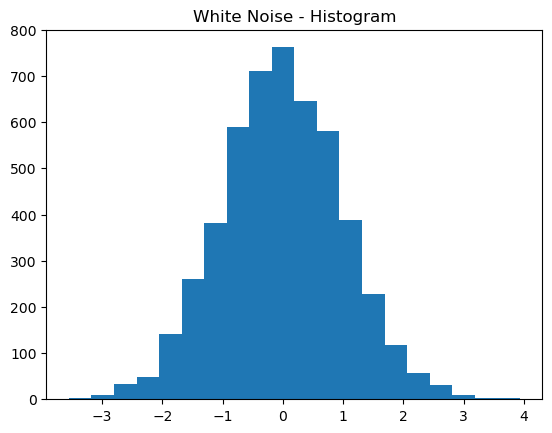

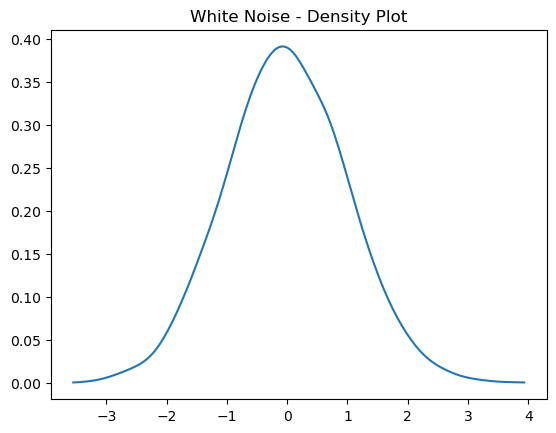

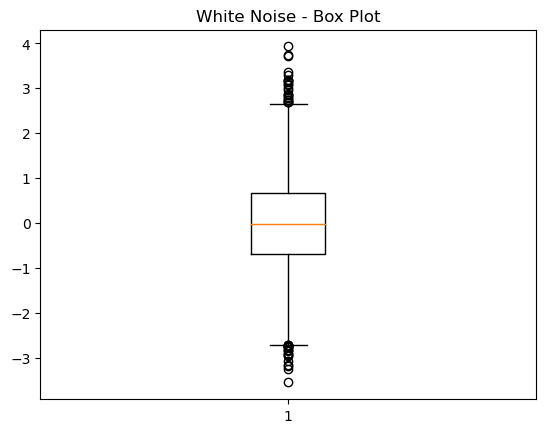

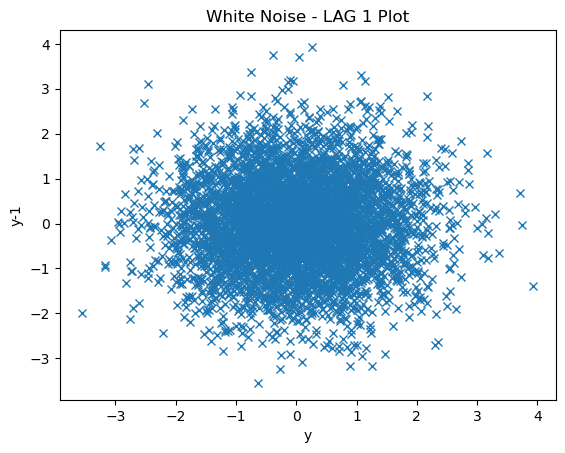

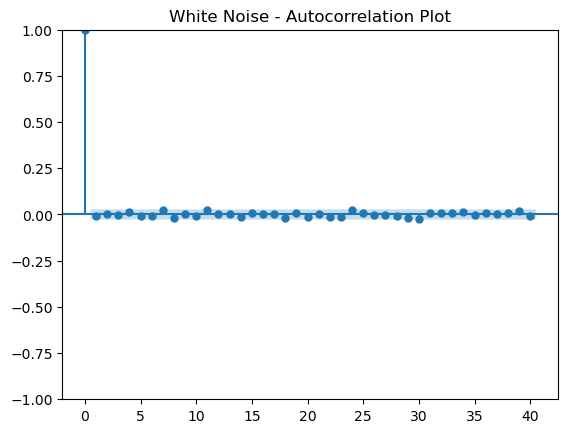

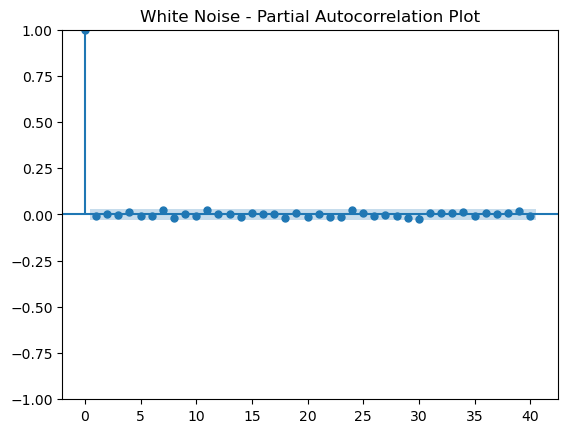

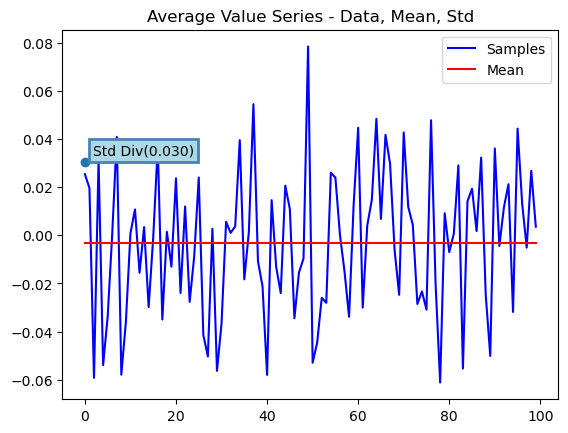

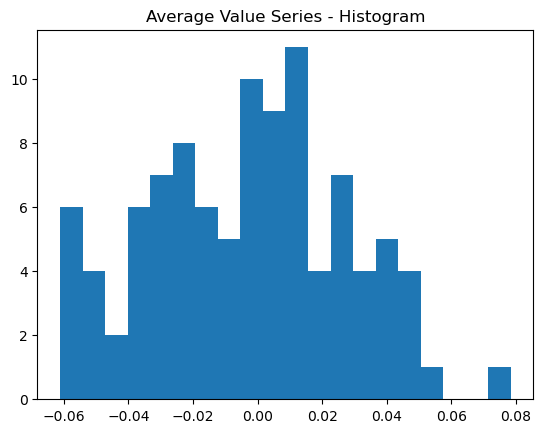

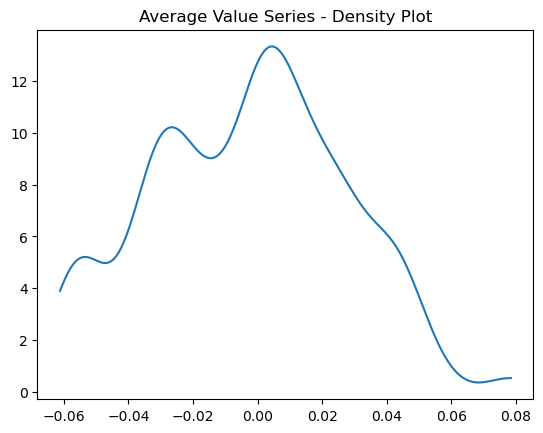

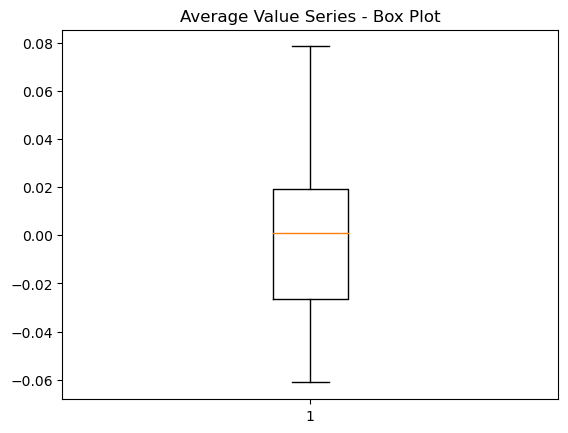

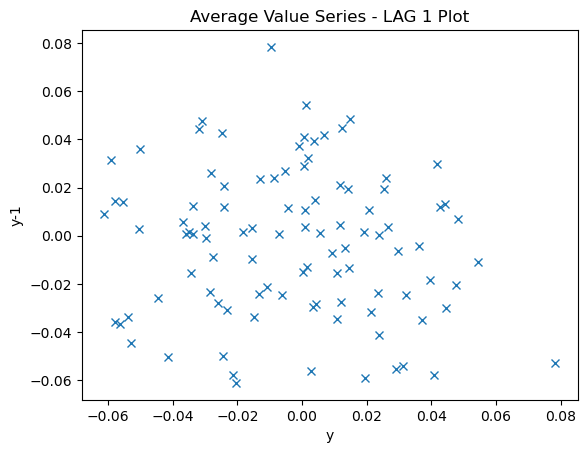

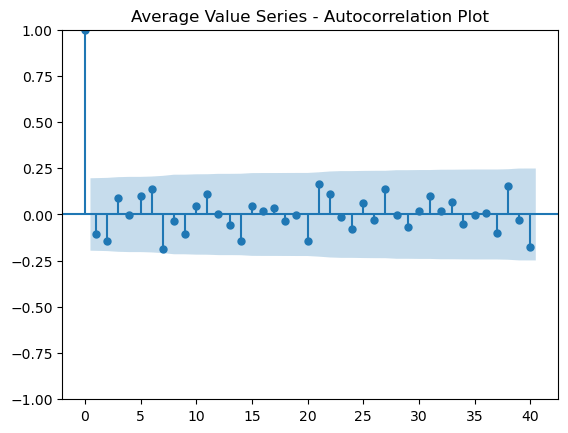

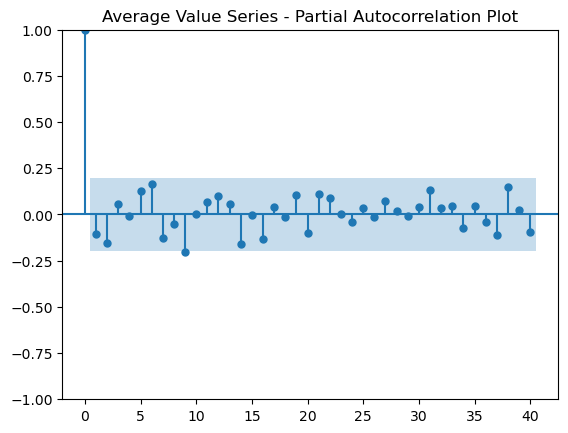

In [2]:
seed = 1
rng = numpy.random.default_rng(seed)
c = 1 # Noise Strength
samples = 1000
test_size = 0.20

x = numpy.arange(0, 5, 1/samples)
#print(x)
# x.sort()
# y_ground_truth = numpy.sin(x * 2 * numpy.pi)
y_ground_truth = numpy.zeros(x.shape)
y = y_ground_truth + c * rng.normal(0, 1, x.shape)

summarize("White Noise", x, y, 20)

# Generating Average valeu series. Not 100% sure if this is what they mean
x = range(0,100)
y = []
for i in x:
    data = c * rng.normal(0, 1, 1000)
    y.append(numpy.average(data))
summarize("Average Value Series", numpy.array(x), numpy.array(y), 20)

Ljung Box
        lb_stat  lb_pvalue
5  4935.844743        0.0
ADF
ADF Statistic: -0.8135589018292734
ADF p_value: 0.8151067616448319
ctrical value: 1%, -3.4369127451400474
ctrical value: 5%, -2.864437475834273
ctrical value: 10%, -2.568312754566378
First Order
Ljung Box
     lb_stat  lb_pvalue
5  3.962511   0.554826
ADF
ADF Statistic: -31.760173520776707
ADF p_value: 0.0
ctrical value: 1%, -3.4369193380671
ctrical value: 5%, -2.864440383452517
ctrical value: 10%, -2.56831430323573


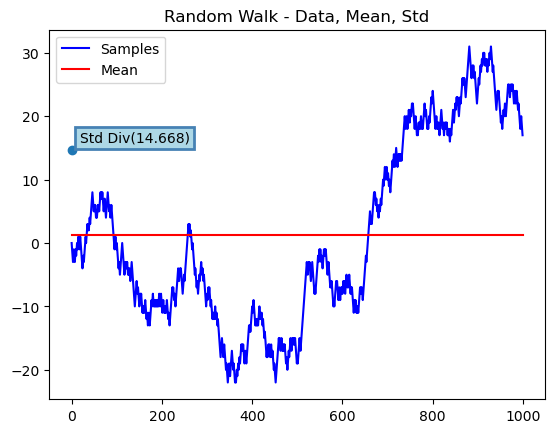

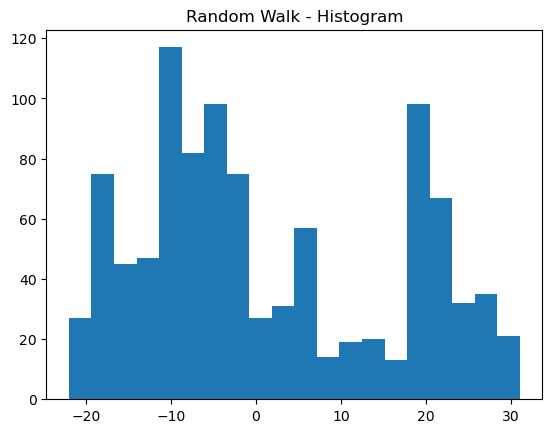

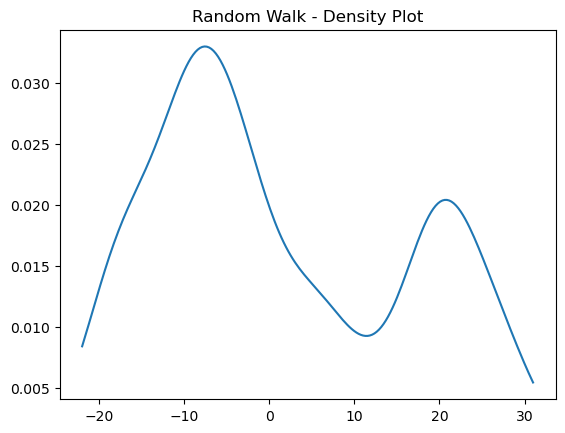

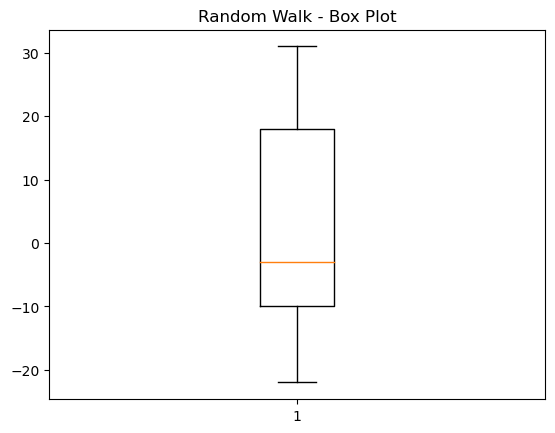

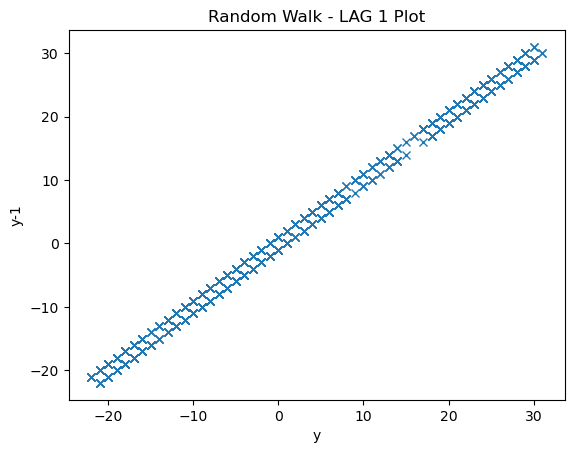

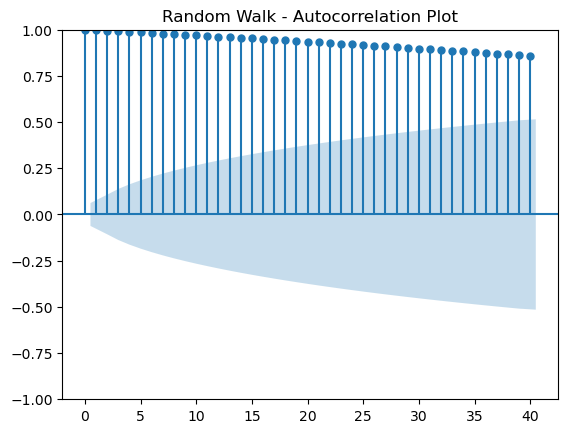

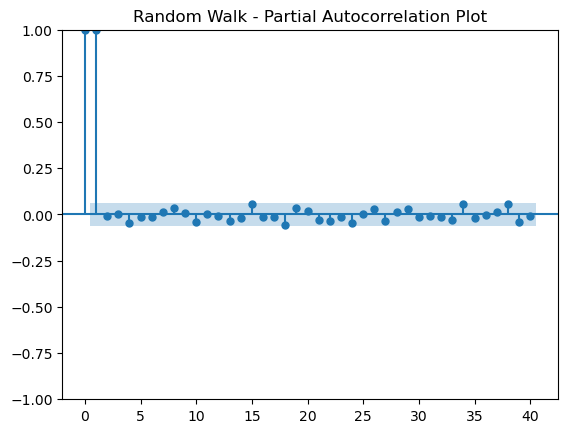

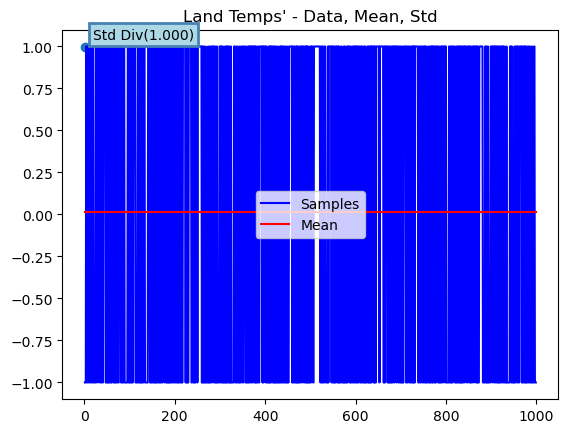

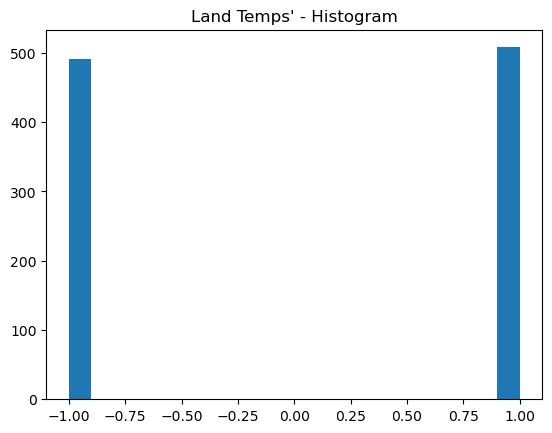

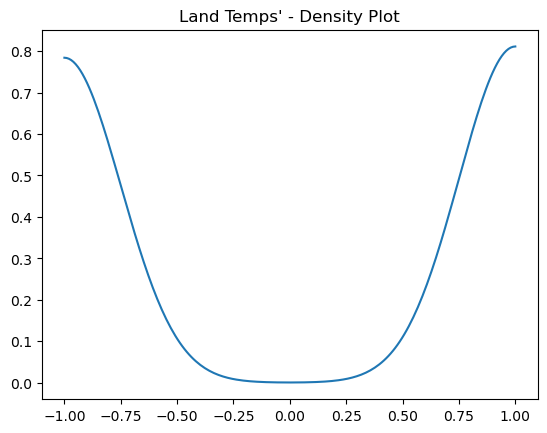

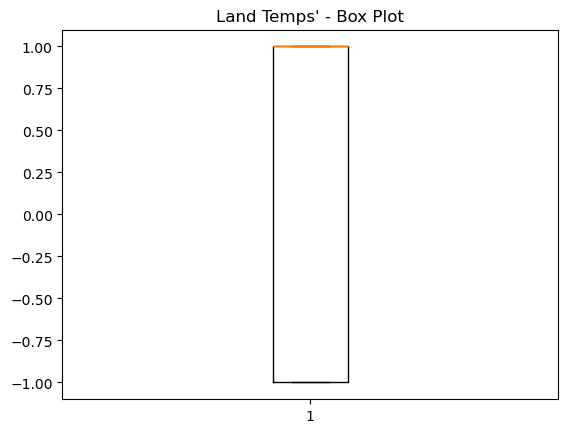

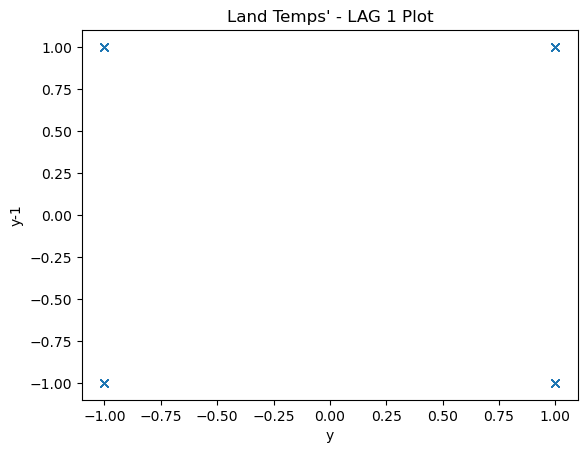

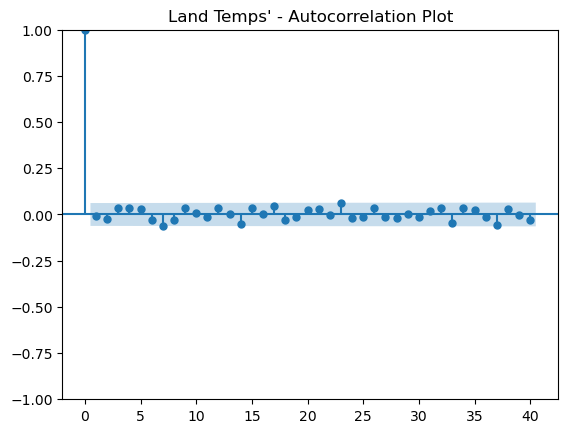

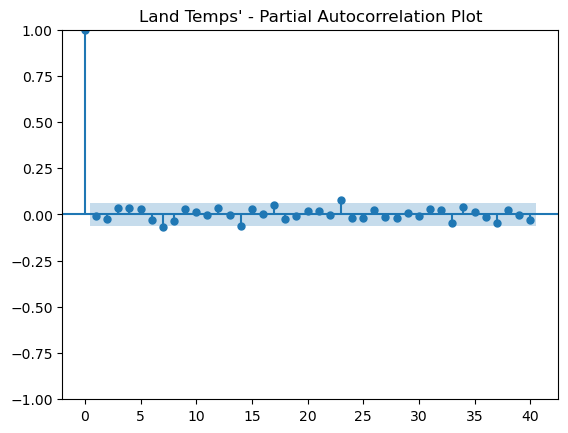

In [3]:
# 3.1.2 Random Walk
seed = 1
rng = numpy.random.default_rng(seed)
N = 1000
x = numpy.arange(0,N)
y = rng.choice([1,-1], x.shape)
y[0] = 0
y = numpy.cumsum(y)
summarize("Random Walk", x, y, 20)

print("First Order")
x2 = x[1:]
y2 = y[1:] - y[:-1]
summarize("Land Temps'", x2, y2, 20)


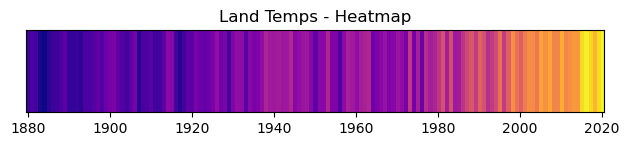

First Order


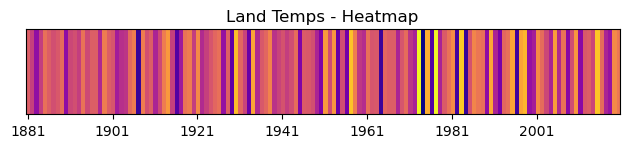

Seasonal Decomposition
STL


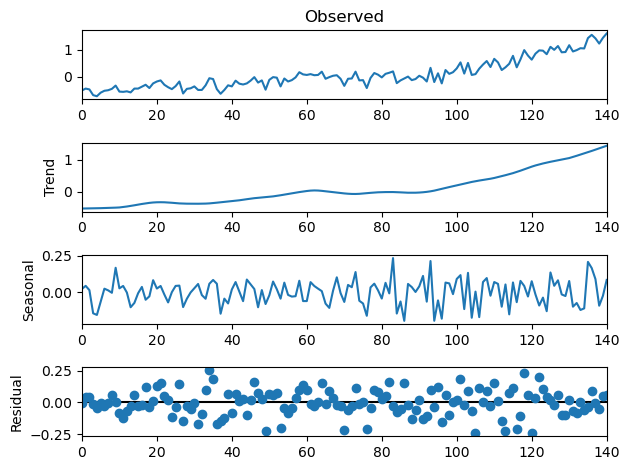

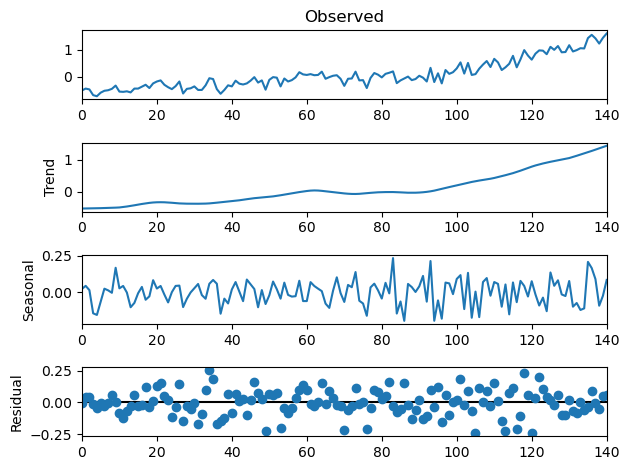

In [8]:
# 3.1.3 Global temp
filename='./statistic_id1048518_global-land-temperature-anomalies-1880-2020.xlsx'
data = pandas.read_excel(io=filename, sheet_name="Data", usecols=[1,2], header=None, skiprows=range(0,5))
n_data = data.to_numpy()
x = n_data[:,0]
y = n_data[:,1]
fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.set_title(f'Land Temps - Heatmap')
ax.imshow([y], cmap="plasma", aspect="20")
ax.set_xticks(numpy.arange(len(x))[::20], labels=[ int(n) for n in x[::20]])
ax.set_yticks([])
plt.show()
summarize("Land Temps", x, y, 20)

print("First Order")
x2 = x[1:]
y2 = y[1:] - y[:-1]
fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.set_title(f'Land Temps - Heatmap')
ax.imshow([y2], cmap="plasma", aspect="20")
ax.set_xticks(numpy.arange(len(x2))[::20], labels=[ int(n) for n in x2[::20]])
ax.set_yticks([])
plt.show()
summarize("Land Temps'", x2, y2, 20)

print("Seasonal Decomposition")
res = sm.tsa.seasonal_decompose(y, model="additive", period=10)
# res.plot()

print("STL")
res = sm.tsa.STL(y, period=10).fit()
res.plot()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


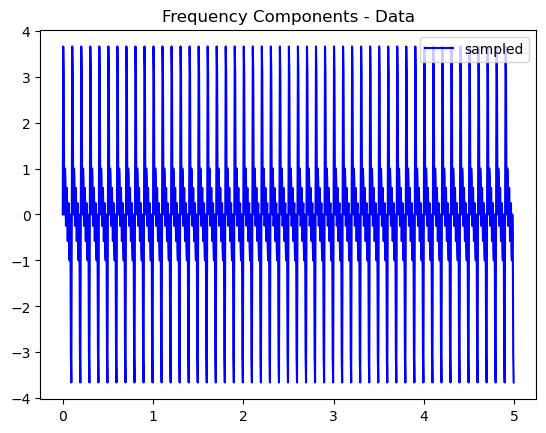

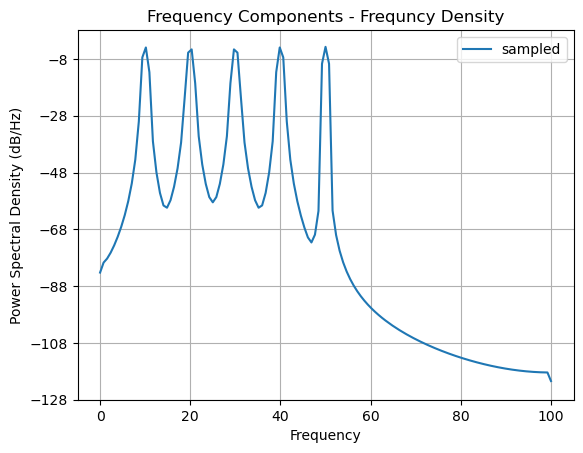

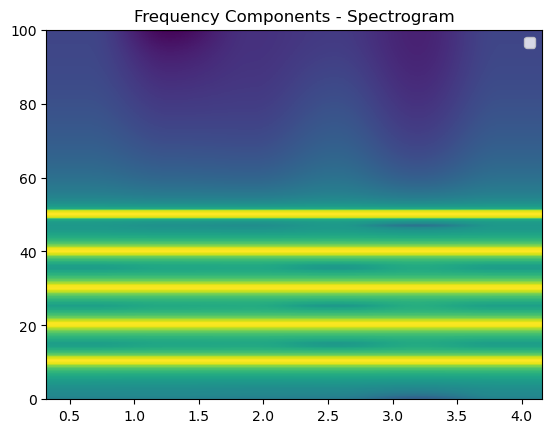

In [5]:
# 3.2.1 Frequency Components
n = 5
freq = 10
duration = 5 #sec
sample_rate = 200 # Hz
x = numpy.arange(0, duration, 1/sample_rate)
y = numpy.zeros(x.shape)
for i in range(1,n + 1):
    y = y + numpy.sin(2 * numpy.pi * i * freq * x)

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Data')
plot_sampled, = ax.plot(x, y, 'b', label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Frequncy Density')
ax.psd(y, Fs=sample_rate, label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Spectrogram')
ax.specgram(y, Fs=sample_rate, label="sampled")
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


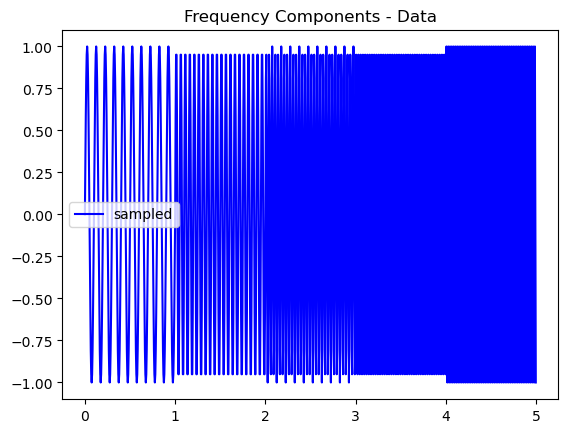

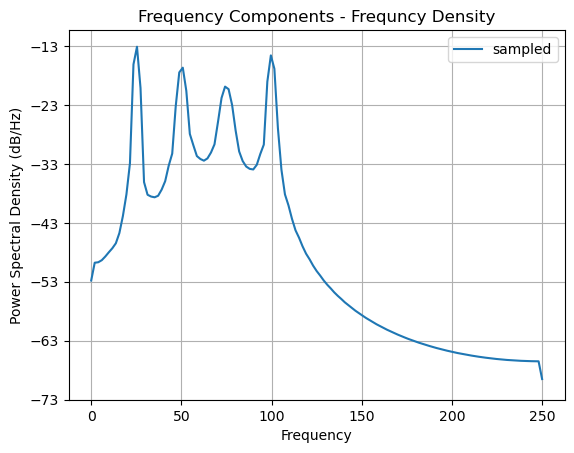

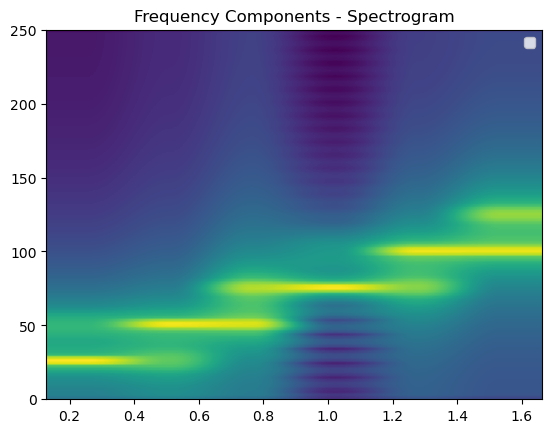

In [13]:
# 3.2.1 Frequency Components
total_duration = 5  # Total duration of the signal in seconds
sampling_rate = 200  # Sampling rate in Hz
x = numpy.linspace(0, total_duration, total_duration * sampling_rate, endpoint=False)

frequencies = [10, 20, 30, 40, 50]  # Frequencies in Hz for each second
y = numpy.zeros_like(x)
for i, freq in enumerate(frequencies, 1):
    mask = (x >= i - 1) & (x < i)  # Mask for each second
    y[mask] = numpy.sin(2 * numpy.pi * freq * x[mask])

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Data')
plot_sampled, = ax.plot(x, y, 'b', label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Frequncy Density')
ax.psd(y, Fs=sample_rate, label="sampled")
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Spectrogram')
ax.specgram(y, Fs=sample_rate, label="sampled")
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['__header__', '__version__', '__globals__', 'EEGa', 'EEGb', 't'])
(1000, 500)
(1000, 500)


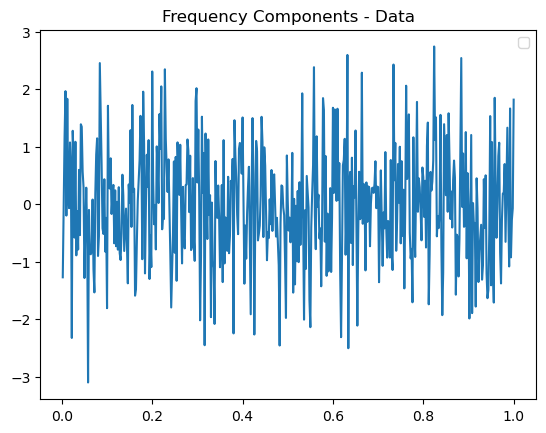

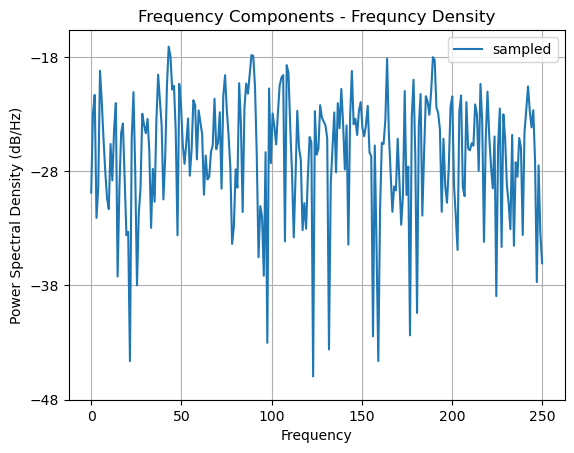

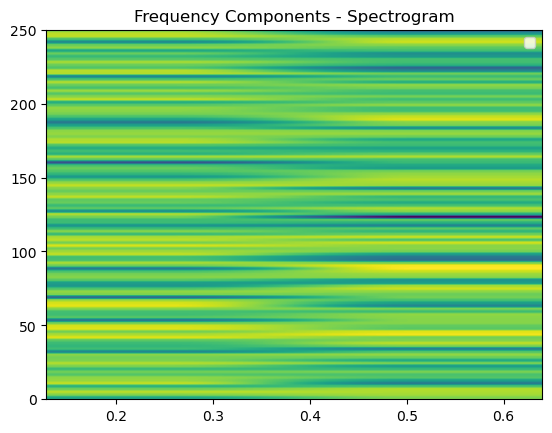

In [6]:
# 3.2.2 EEG data
data = loadmat('./02_EEG-1.mat')
print(data.keys())
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t'][0]

duration = 1 #sec
sample_rate = 500 # Hz

print(EEGa.shape)
print(EEGb.shape)
x = t
y = numpy.average(EEGa, axis=0)
y = EEGa[1]
fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Data')
plot_sampled, = ax.plot(x, y)
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Frequncy Density')
ax.psd(y, Fs=sample_rate, label="sampled", NFFT=512)
ax.legend()

fig, ax = plt.subplots()
ax.set_title(f'Frequency Components - Spectrogram')
ax.specgram(y, Fs=sample_rate, label="sampled")
ax.legend()


## 

In [7]:
[str(n) for n in range(14,-1,-1)]

['14',
 '13',
 '12',
 '11',
 '10',
 '9',
 '8',
 '7',
 '6',
 '5',
 '4',
 '3',
 '2',
 '1',
 '0']